In [2]:
import numpy as np
import pandas as pd

data_mahasiswa = pd.read_csv('./dataMahasiswa.csv')
data_mahasiswa

,mhs,ipk,gaji
0,A,3.00,10
1,B,2.99,1


In [3]:
data_ipk = np.array(data_mahasiswa)
data_ipk = data_ipk[:,[0,1]]

ipk_A = np.sum(data_ipk[0:1,1], axis=0)
ipk_B = np.sum(data_ipk[1:2,1], axis=0)

print("ipk_A : ", ipk_A)
print("ipk_B : ", ipk_B)

ipk_A :  3.0
ipk_B :  2.99


In [4]:
data_gaji = np.array(data_mahasiswa)
data_gaji = data_gaji[:,[0,2]]

gaji_A = np.sum(data_gaji[0:1,1], axis=0)
gaji_B = np.sum(data_gaji[1:2,1], axis=0)

print("gaji_A : ", gaji_A)
print("gaji_B : ", gaji_B)

gaji_A :  10
gaji_B :  1


In [7]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_ipk = np.arange(0, 4, 0.25)
x_gaji = np.arange(0, 15, 1)
x_nk = np.arange(0, 100, 1)

#membership function
ipk_buruk = fuzz.trapmf(x_ipk, [0, 0, 2, 2.75])
ipk_cukup = fuzz.trimf(x_ipk, [2, 2.75, 3.25])
ipk_bagus = fuzz.trapmf(x_ipk, [2.75, 3.25, 4, 4])

#gaji
gaji_kecil = fuzz.trapmf(x_gaji, [0, 0, 1, 3])
gaji_sedang = fuzz.trapmf(x_gaji, [1, 2, 4, 6])
gaji_besar = fuzz.trapmf(x_gaji, [4, 6, 7, 12])
gaji_sangat_besar = fuzz.trapmf(x_gaji, [7, 12, 15, 15])

#nilai kelayakan
nk_rendah = fuzz.trapmf(x_nk, [0, 0, 20, 80])
nk_tinggi = fuzz.trapmf(x_nk, [50, 80, 100, 100]) 

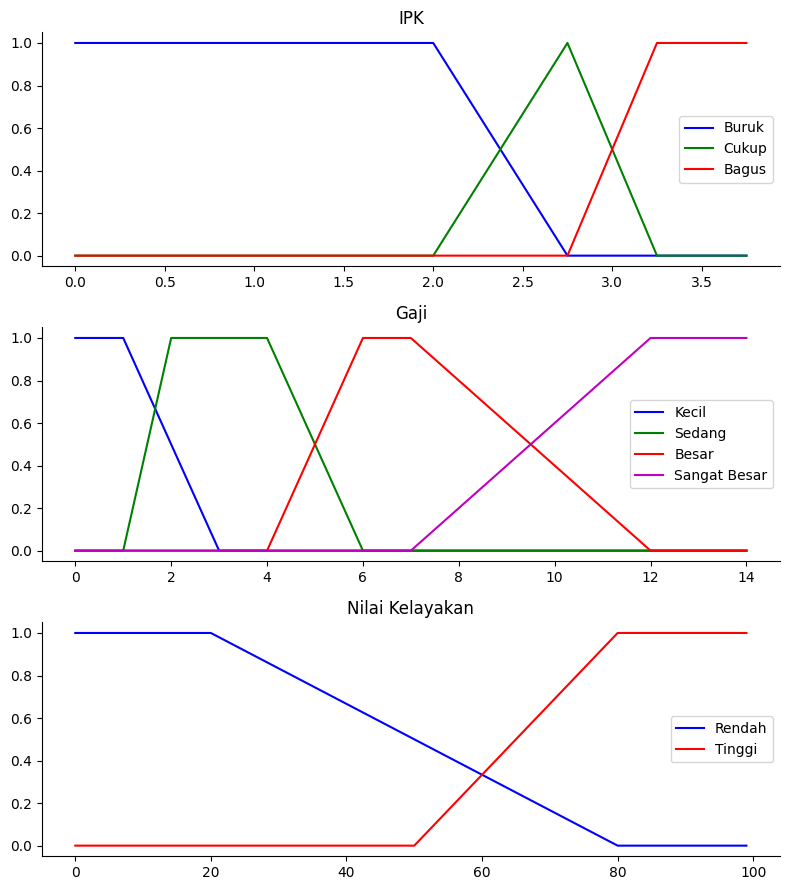

In [8]:
#kurva membership function
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_ipk, ipk_buruk, 'b', linewidth=1.5, label='Buruk')
ax0.plot(x_ipk, ipk_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.plot(x_ipk, ipk_bagus, 'r', linewidth=1.5, label='Bagus')
ax0.set_title('IPK')
ax0.legend()

ax1.plot(x_gaji, gaji_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_gaji, gaji_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_gaji, gaji_besar, 'r', linewidth=1.5, label='Besar')
ax1.plot(x_gaji, gaji_sangat_besar, 'm', linewidth=1.5, label='Sangat Besar')
ax1.set_title('Gaji')
ax1.legend()

ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()



In [9]:
#fungsi keanggotaan IPK
def fungsiKeanggotaan_IPK(_nilai):
    buruk = fuzz.interp_membership(x_ipk, ipk_buruk, _nilai)
    cukup = fuzz.interp_membership(x_ipk, ipk_cukup, _nilai)
    bagus = fuzz.interp_membership(x_ipk, ipk_bagus, _nilai)

    return buruk, cukup, bagus

#fungsi keanggotaan Gaji

def fungsiKeanggotaan_Gaji(_nilai):
    kecil = fuzz.interp_membership(x_gaji, gaji_kecil, _nilai)
    sedang = fuzz.interp_membership(x_gaji, gaji_sedang, _nilai)
    besar = fuzz.interp_membership(x_gaji, gaji_besar, _nilai)
    sangat_besar = fuzz.interp_membership(x_gaji, gaji_sangat_besar, _nilai)

    return kecil, sedang, besar, sangat_besar


In [12]:
#menghitung derajat keanggotaan IPK
ipk_mhsA = fungsiKeanggotaan_IPK(ipk_A)
ipk_mhsB = fungsiKeanggotaan_IPK(ipk_B)

print("IPK Mahasiswa A : ", ipk_mhsA)
print("IPK Mahasiswa B : ", ipk_mhsB)

#menghitung derajat keanggotaan Gaji
gaji_mhsA = fungsiKeanggotaan_Gaji(gaji_A)
gaji_mhsB = fungsiKeanggotaan_Gaji(gaji_B)

print("Gaji Mahasiswa A : ", gaji_mhsA)
print("Gaji Mahasiswa B : ", gaji_mhsB)


IPK Mahasiswa A :  (0.0, 0.5, 0.5)
IPK Mahasiswa B :  (0.0, 0.5199999999999996, 0.4800000000000004)
Gaji Mahasiswa A :  (0.0, 0.0, 0.4, 0.6)
Gaji Mahasiswa B :  (1.0, 0.0, 0.0, 0.0)


In [13]:
#rule 7. IF IPK = Cukup AND Gaji = Besar THEN NK = Rendah
nk_7 = np.fmin(ipk_mhsA[1], gaji_mhsA[3])

#rule 8. IF IPK = Cukup AND Gaji = Sangat Besar THEN NK = Rendah
nk_8 = np.fmin(ipk_mhsA[1], gaji_mhsA[3])

#rule 11. IF IPK = Bagus AND Gaji = Besar THEN NK = Tinggi
nk_11 = np.fmin(ipk_mhsA[2], gaji_mhsA[2])

#rule 12. IF IPK = Bagus AND Gaji = Sangat Besar THEN NK = Rendah
nk_12 = np.fmin(ipk_mhsA[2], gaji_mhsA[3])

mhsA_nk_rendah = np.fmax(nk_7, np.fmax(nk_8, nk_12))
mhsA_nk_tinggi = nk_11

print("Nilai Kelayakan Mahasiswa A")
print("NK Rendah : ", mhsA_nk_rendah)
print("NK Tinggi : ", mhsA_nk_tinggi)

Nilai Kelayakan Mahasiswa A
NK Rendah :  0.5
NK Tinggi :  0.4


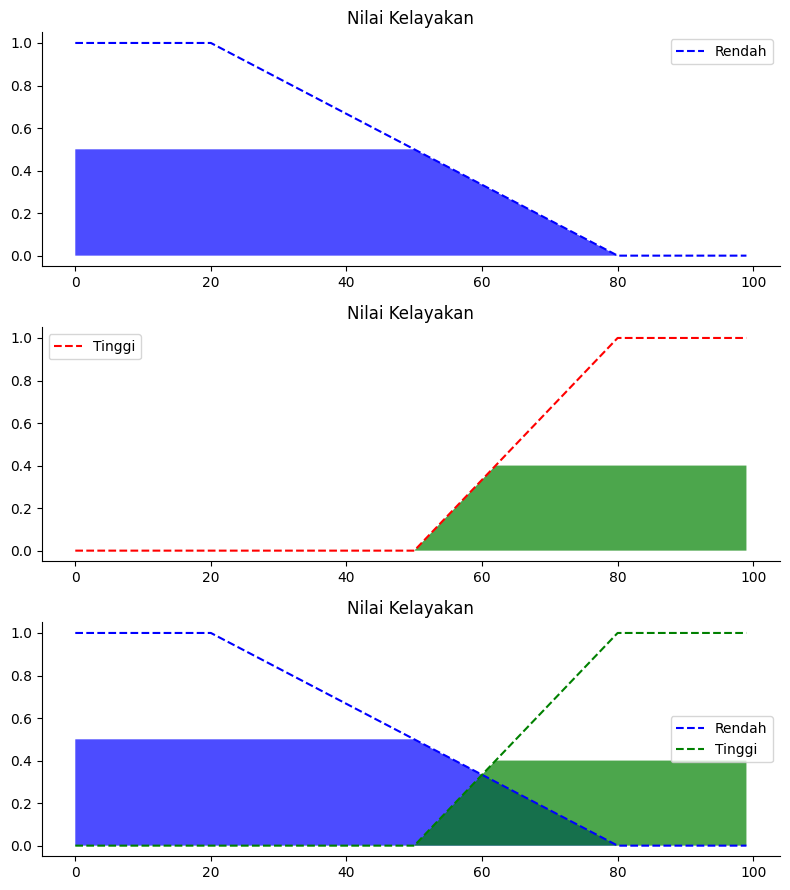

In [16]:
#untuk plot arsir, pakai np.fmin
mhsA_nk_rendah = np.fmin(mhsA_nk_rendah, nk_rendah)
mhsA_nk_tinggi = np.fmin(mhsA_nk_tinggi, nk_tinggi)

#titik awal arsir
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

#visualize
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

#x_nk_rendah = np.arrange(0, 80 1)
ax0.fill_between(x_nk, nkr, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, linestyle='--', label='Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax2.fill_between(x_nk, nk0, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

#turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [15]:
#rule 5. IF IPK = Cukup AND Gaji = Kecil THEN NK = Tinggi
nk_5 = np.fmin(ipk_mhsB[1], gaji_mhsB[0])

#rule 5. IF IPK = Cukup AND Gaji = Sedang THEN NK = Rendah
nk_6 = np.fmin(ipk_mhsB[1], gaji_mhsB[1])

#rule 9. IF IPK = Bagus AND Gaji = Kecil THEN NK = Tinggi
nk_9 = np.fmin(ipk_mhsB[2], gaji_mhsB[0])

#rule 10. IF IPK = Bagus AND Gaji = Sedang THEN NK = Tinggi
nk_10 = np.fmin(ipk_mhsB[2], gaji_mhsB[1])

mhsB_nk_rendah = nk_6
mhsB_nk_tinggi = np.fmax(nk_5, np.fmax(nk_9, nk_10))

print("Nilai Kelayakan Mahasiswa B")
print("NK Rendah : ", mhsB_nk_rendah)
print("NK Tinggi : ", mhsB_nk_tinggi)


Nilai Kelayakan Mahasiswa B
NK Rendah :  0.0
NK Tinggi :  0.5199999999999996


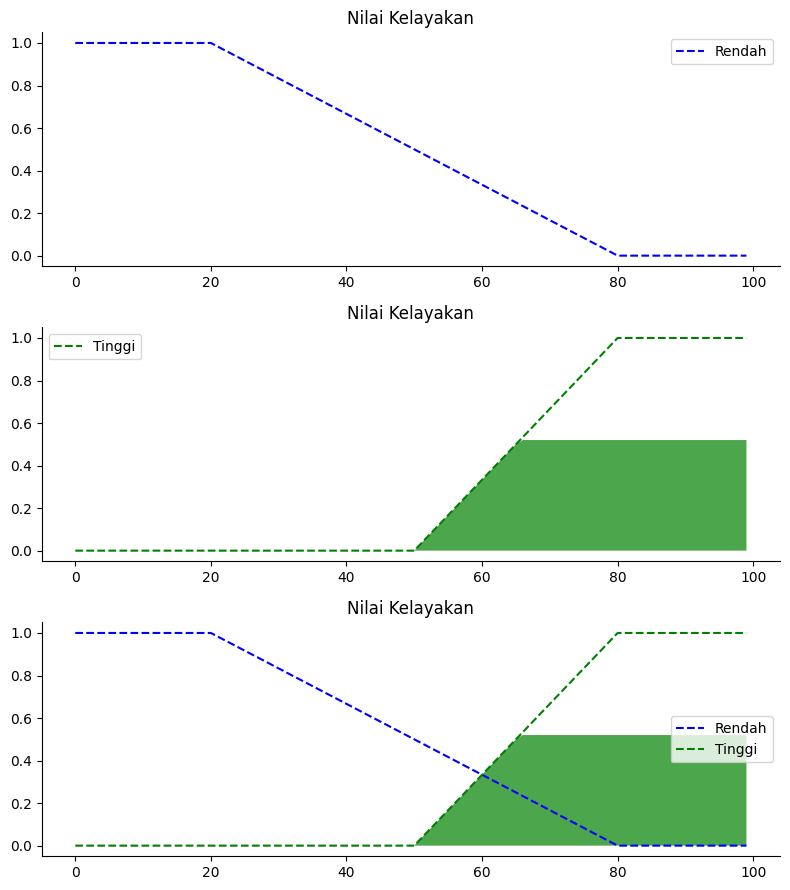

In [17]:
#untuk Plot arsir, pakai np.fmin
mhsB_nk_rendah = np.fmin(mhsB_nk_rendah, nk_rendah)
mhsB_nk_tinggi = np.fmin(mhsB_nk_tinggi, nk_tinggi)

#titik awal arsir
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

#visualize
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

#x_nk_rendah = np.arrange(0, 80 1)
ax0.fill_between(x_nk, nkr, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax2.fill_between(x_nk, nk0, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

#turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


Nilai Kelayakan Mahasiswa A :  46.732289336316235


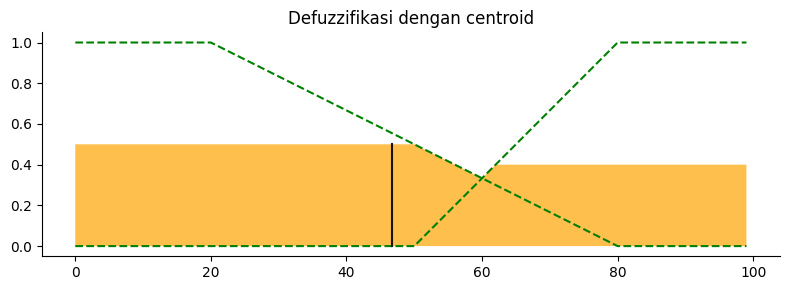

In [19]:
#komposisi aturan
komposisi = np.fmax(mhsA_nk_rendah, mhsA_nk_tinggi)

#defuzzifikasi
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')
print("Nilai Kelayakan Mahasiswa A : ", nk)

#nilai fuzzy untuk membership function
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
nk_defuzzy

#visualisasi hasil
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzifikasi dengan centroid')

#turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()



Nilai Kelayakan Mahasiswa B :  78.15624027388732


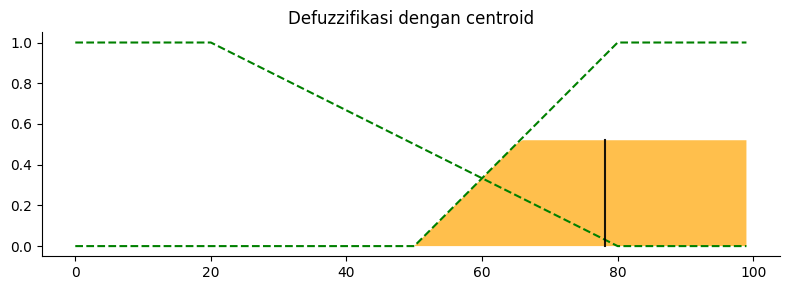

In [21]:
#komposisi aturan
komposisi = np.fmax(mhsB_nk_rendah, mhsB_nk_tinggi)

#defuzzifikasi
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')
print("Nilai Kelayakan Mahasiswa B : ", nk)

#nilai fuzzy untuk membership function
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
nk_defuzzy

#visualisasi hasil
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)

ax0.set_title('Defuzzifikasi dengan centroid')

#turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

